## Reto 4: Las mejores 50

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - Agrupaciones y reducciones
        - Reordenamiento
        - Unión de `DataFrames` usando `merge`
    
---
    
### 2. Desarrollo:

#### a) Las 50 películas con mejor rating

Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos `movies` y `ratings`.
2. Agrupa `ratings` por id de película y computa el promedio de `rating` para cada película
3. Crea un nuevo `DataFrame` que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al `DataFrame` anterior los nombres de las películas usando la tabla `movies`.
5. Al final tendrás un `DataFrame` con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable `las_mejores_50`.

In [1]:
import pandas as pd

In [5]:
movies = pd.read_csv('../Ejemplo-02/movies.csv', sep="#")
ratings = pd.read_csv('../Ejemplo-02/ratings.csv', index_col=[0, 1])

rating  timestamp
user_id movie_id                   
1       1193           5  978300760
        661            3  978302109
        914            3  978301968
        3408           4  978300275
        2355           5  978824291
...                  ...        ...
6040    1091           1  956716541
        1094           5  956704887
        562            5  956704746
        1096           4  956715648
        1097           4  956715569

[3000627 rows x 2 columns]

In [50]:
grouped = ratings.groupby("movie_id")["rating"].mean().reset_index(name='rating').set_index("movie_id", drop=True)

raitings_50 = grouped.sort_values("rating",ascending=False).head(50)

movies_50 = pd.merge(raitings_50, movies, left_on="movie_id", right_index=True)

las_mejores_50 = movies_50[ ["title","rating"] ]

las_mejores_50

,title,rating
movie_id,,
989,Ed's Next Move (1996),5.000000
3881,Two Family House (2000),5.000000
1830,Passion in the Desert (1998),5.000000
3382,Guess Who's Coming to Dinner (1967),5.000000
787,"Old Lady Who Walked in the Sea, The (Vieille q...",5.000000
3280,"Perils of Pauline, The (1947)",5.000000
3607,Eraserhead (1977),5.000000
3233,Beautiful People (1999),5.000000
3172,"Cup, The (Phörpa) (1999)",5.000000


La celda de validación lo que hará es realizar una gráfica de barras mostrando el nombre de la película y el rating promedio, no olvides comparar tus resultados ...

c:\users\hborda\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


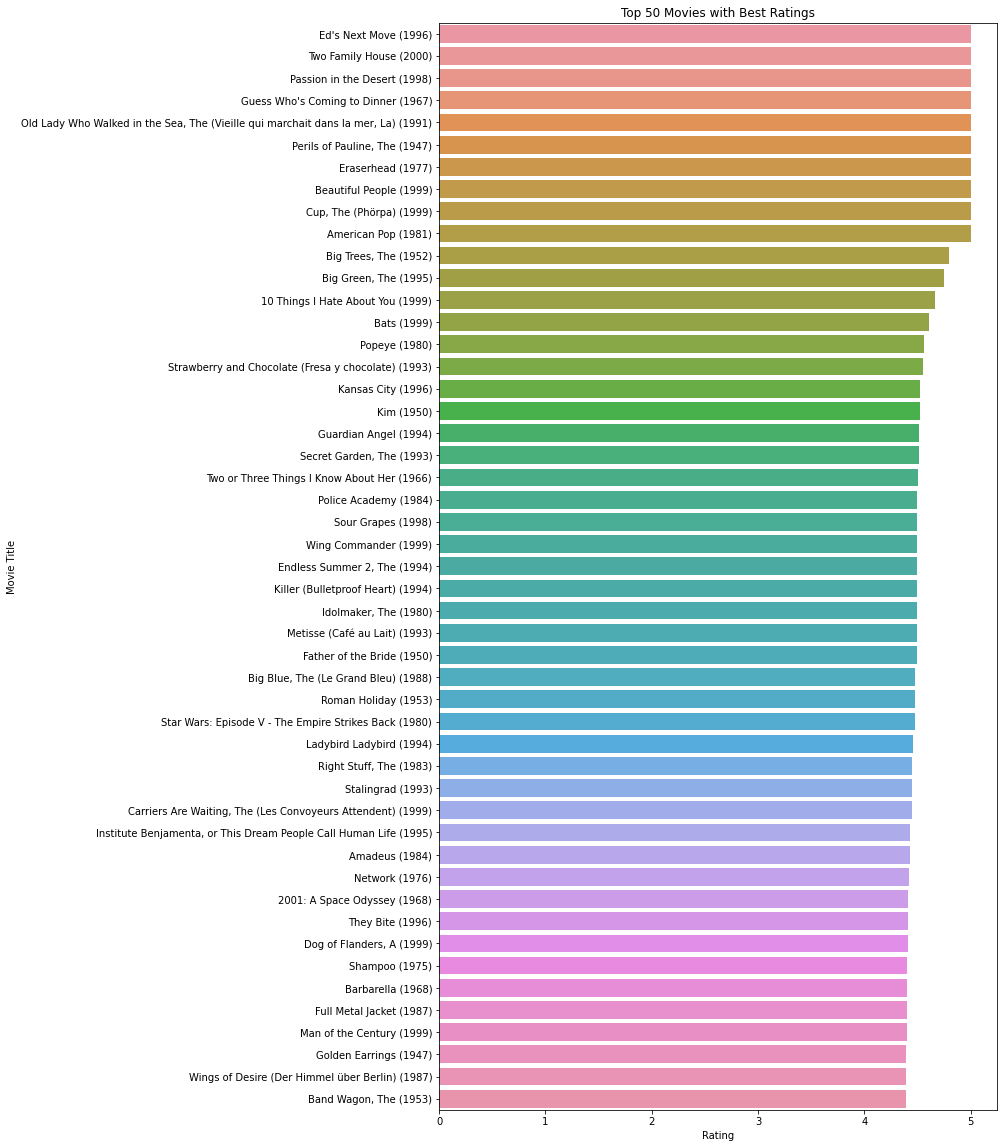

In [51]:
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 20))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')
    
plotting_best_50(las_mejores_50)